<a href="https://colab.research.google.com/github/Yuyhhhh/AI_Project/blob/main/share_price_predecdtion_of_companies_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import required modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
from datetime import datetime
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:

# Set sytle for plots
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
# This line helps to show the graph in notebook only
%matplotlib inline

# Change the default behavior of Yahoo Finance data
yf.pdr_override()
# This line changes the default behavior of Yahoo Finance data retrieval
# to make it compatible with the pandas_datareader library.

# Create a list of tech
tech_list = ['AAPL', 'GOOG', 'MSFT', 'AMZN']

# Create end and start time for stock
end = datetime.now()
start = datetime(end.year - 1, end.month, end.day)

# Download stock data of tech list and save it in global variables
for stock in tech_list:
  globals()[stock] = yf.download(stock, start, end)

# Create list of company and their name
company_list = [AAPL, GOOG, MSFT, AMZN] # This contains dataset for companies
company_name = ["AAPL", "GOOG", "MICROSOFT", "AMAZON"]

# Create the dataframe for each company data
for company, com_name in zip(company_list, company_name):
  # Add company name to dataframe
  company["company_name"] = com_name
  # Concat dataframe
  df = pd.concat(company_list, axis=0)

# Show last 10 row of dataframe
df.tail(100)

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,company_name
Date,,,,,,,
2023-12-08,145.479996,147.839996,145.399994,147.419998,147.419998,41858000,AMAZON
2023-12-11,145.660004,146.190002,143.639999,145.889999,145.889999,50907300,AMAZON
2023-12-12,145.520004,147.500000,145.300003,147.479996,147.479996,44944300,AMAZON
2023-12-13,148.119995,149.460007,146.820007,148.839996,148.839996,52766200,AMAZON
2023-12-14,149.929993,150.539993,145.520004,147.419998,147.419998,58400800,AMAZON
...,...,...,...,...,...,...,...
2024-04-26,177.800003,180.820007,176.130005,179.619995,179.619995,43919800,AMAZON
2024-04-29,182.750000,183.529999,179.389999,180.960007,180.960007,54063900,AMAZON
2024-04-30,181.089996,182.990005,174.800003,175.000000,175.000000,94639800,AMAZON


In [ ]:
# Show description of AAPL of dataframe
AAPL.describe()

,Open,High,Low,Close,Adj Close,Volume
count,252.000000,252.000000,252.000000,252.000000,252.000000,2.520000e+02
mean,181.168730,182.644286,179.805952,181.271270,180.892181,5.806802e+07
std,8.696426,8.535885,8.666348,8.647677,8.596965,1.777028e+07
min,164.889999,166.399994,164.080002,165.000000,164.909744,2.404830e+07
25%,173.327503,175.072506,172.050003,173.637505,173.282696,4.678918e+07
50%,180.379997,182.079994,178.440002,180.640007,180.048973,5.371445e+07
75%,189.277496,189.990005,187.652500,189.317501,188.879906,6.485765e+07
max,198.020004,199.619995,197.000000,198.110001,197.857529,1.366826e+08


In [ ]:
# Show the info of dataframe
AAPL.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 252 entries, 2023-05-03 to 2024-05-02
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Open          252 non-null    float64
 1   High          252 non-null    float64
 2   Low           252 non-null    float64
 3   Close         252 non-null    float64
 4   Adj Close     252 non-null    float64
 5   Volume        252 non-null    int64  
 6   company_name  252 non-null    object 
dtypes: float64(5), int64(1), object(1)
memory usage: 15.8+ KB


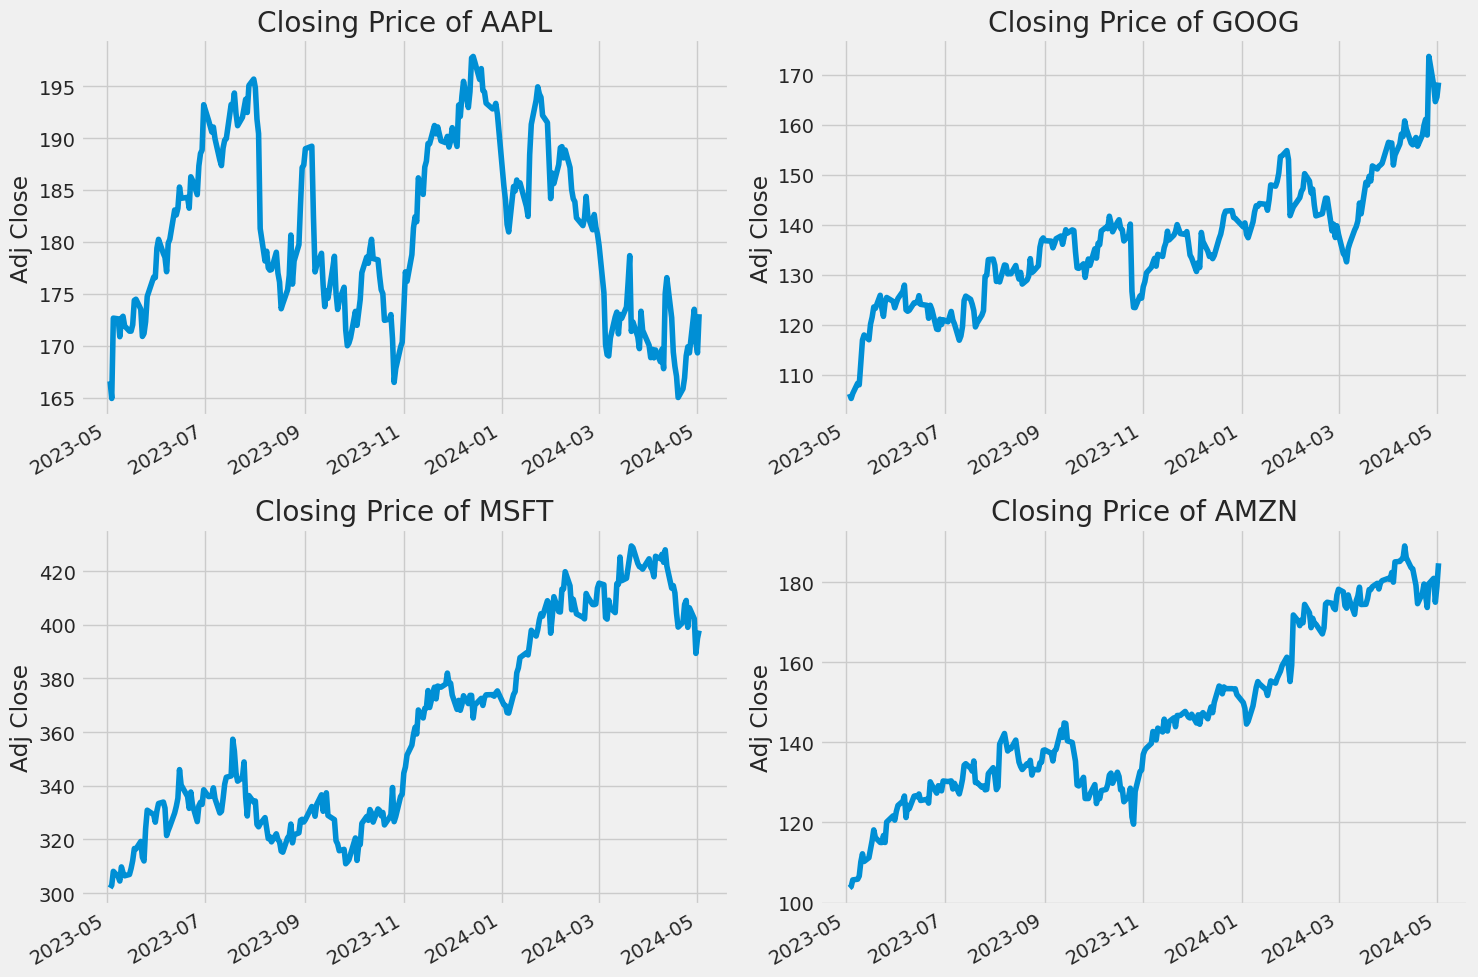

In [ ]:
# Set figure and subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2) # Adjust margin to top and bottom

# Create subplot for adjusted close time for each compnay
for i, company in enumerate(company_list, 1):
  # Create subplot
  plt.subplot(2, 2, i)
  # Plot the column
  company['Adj Close'].plot()
  # Set Y label
  plt.ylabel('Adj Close')
  # Set X label
  plt.xlabel(None)
  # Set title
  plt.title(f"Closing Price of {tech_list[i - 1]}")

# Automatically adjust the subplot parameters for better layout
plt.tight_layout()

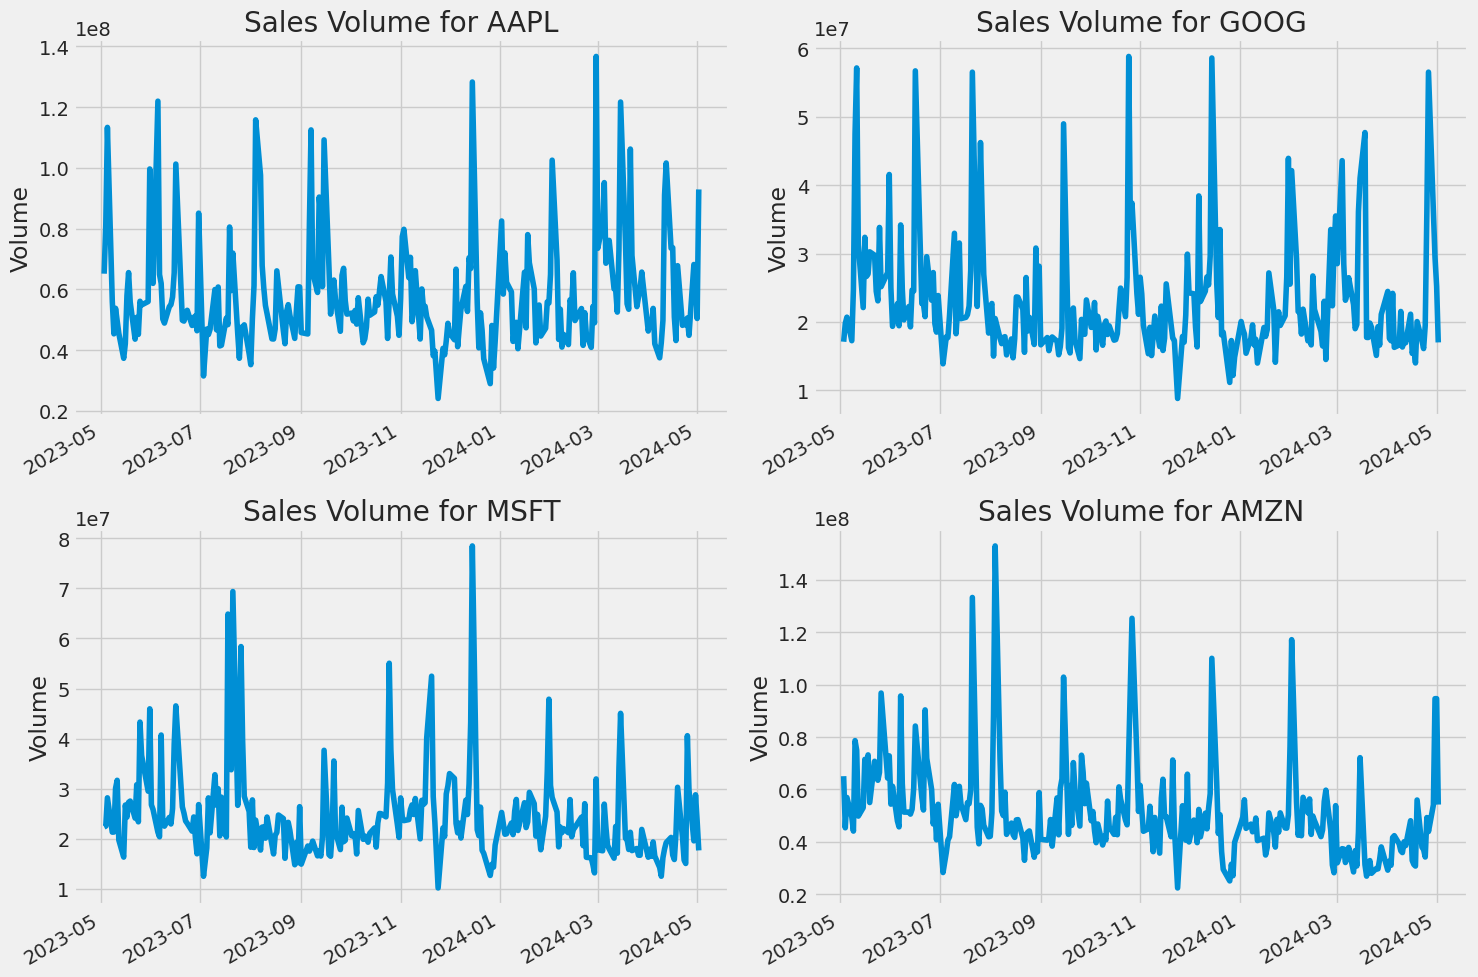

In [ ]:
# Set figure and subplots
plt.figure(figsize=(15, 10))
plt.subplots_adjust(top=1.25, bottom=1.2)

# Create subplot for volumne for each compnay
for i, company in enumerate(company_list, 1):
  # Create subplot
  plt.subplot(2, 2, i)
  # Plot the column
  company['Volume'].plot()
  # Set Y label
  plt.ylabel('Volume')
  # Set X label
  plt.xlabel(None)
  # Set title
  plt.title(f"Sales Volume for {tech_list[i - 1]}")

# Automatically adjust the subplot parameters for better layout
plt.tight_layout()

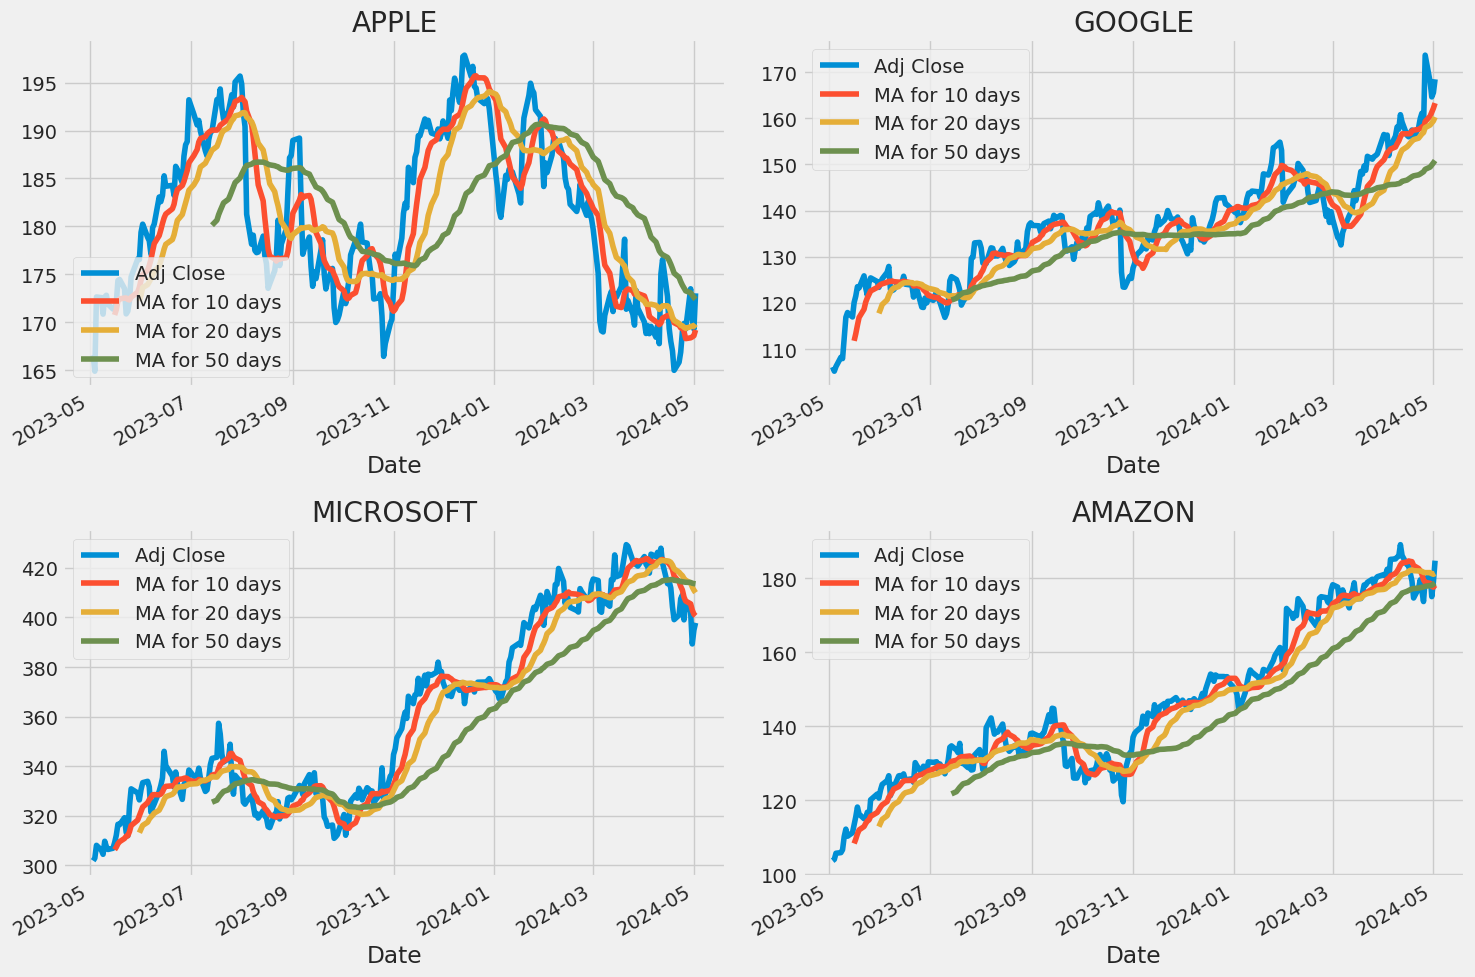

In [ ]:
# Create a list for moving average day
ma_day = [10, 20, 50]

# Create a new column for ma days
for ma in ma_day:
  for company in company_list:
    column_name = f"MA for {ma} days"
    company[column_name] = company['Adj Close'].rolling(ma).mean()

# Plot the graph
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the graph for AAPL
AAPL[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,0])
axes[0,0].set_title('APPLE')

# Plot the graph for GOOG
GOOG[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[0,1])
axes[0,1].set_title('GOOGLE')

# Plot the graph for MSFT
MSFT[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,0])
axes[1,0].set_title('MICROSOFT')

# Plot the graph for AMZN
AMZN[['Adj Close', 'MA for 10 days', 'MA for 20 days', 'MA for 50 days']].plot(ax=axes[1,1])
axes[1,1].set_title('AMAZON')

# Automatically adjust the subplot parameters for better layout
fig.tight_layout()

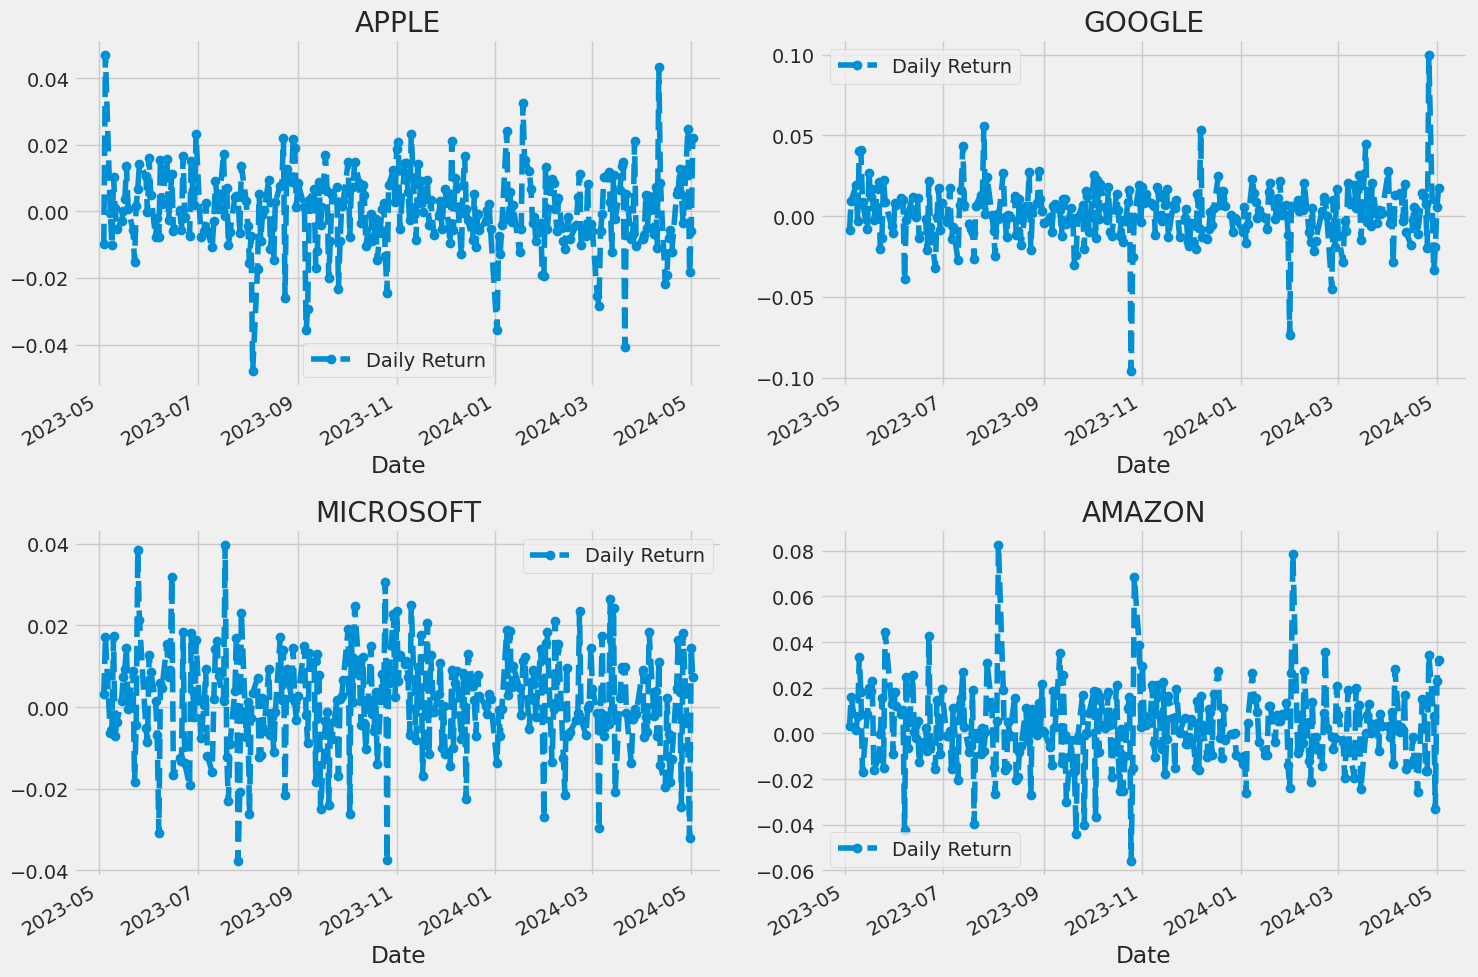

In [ ]:
# We'll use pct_change to find the percent change for each day
for company in company_list:
  company['Daily Return'] = company['Adj Close'].pct_change()

# Then we'll plot the daily return percentage
fig, axes = plt.subplots(nrows=2, ncols=2)
fig.set_figheight(10)
fig.set_figwidth(15)

# Plot the graph for AAPL
AAPL['Daily Return'].plot(ax=axes[0,0], legend=True, linestyle='--', marker='o')
axes[0,0].set_title('APPLE')

# Plot the graph for GOOG
GOOG['Daily Return'].plot(ax=axes[0,1], legend=True, linestyle='--', marker='o')
axes[0,1].set_title('GOOGLE')

# Plot the graph for MSFT
MSFT['Daily Return'].plot(ax=axes[1,0], legend=True, linestyle='--', marker='o')
axes[1,0].set_title('MICROSOFT')

# Plot the graph for AMZN
AMZN['Daily Return'].plot(ax=axes[1,1], legend=True, linestyle='--', marker='o')
axes[1,1].set_title('AMAZON')

# Automatically adjust the subplot parameters for better layout
fig.tight_layout()

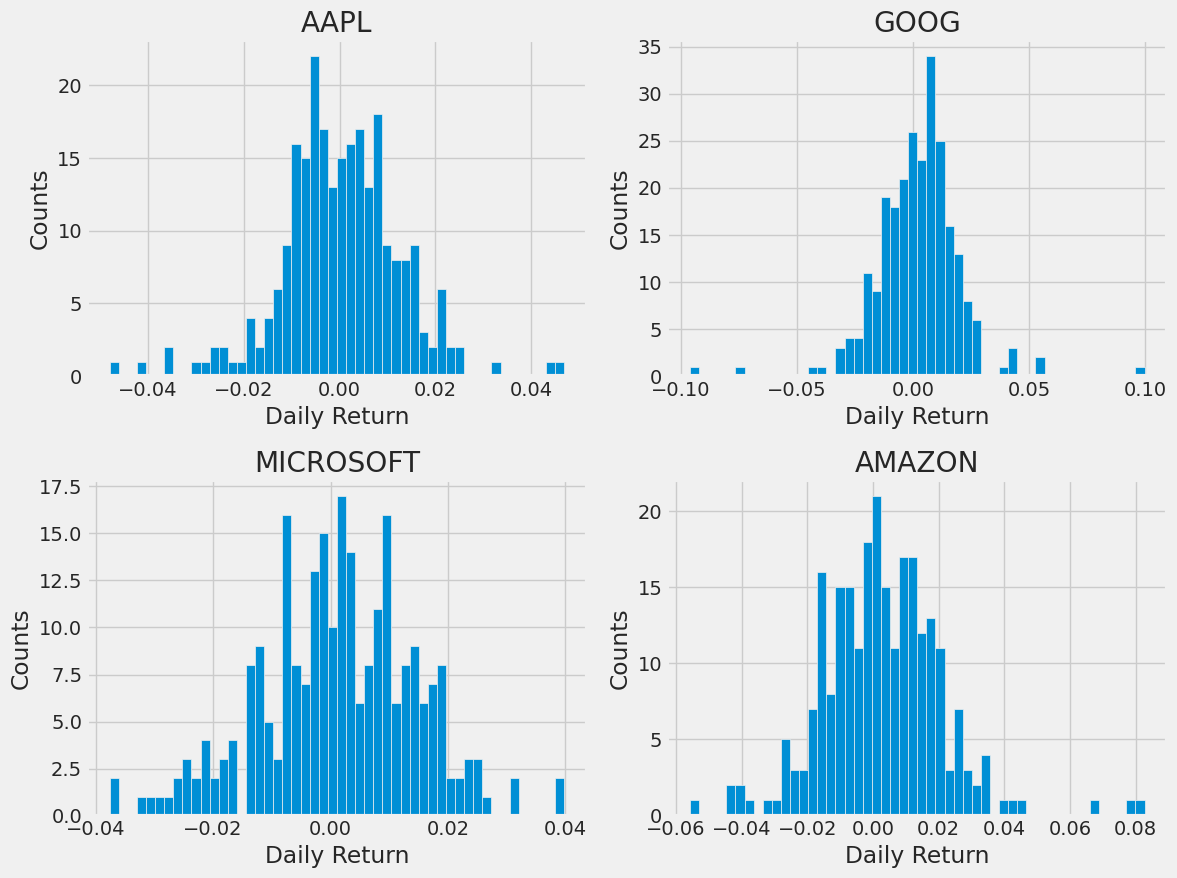

In [ ]:
# Set plot
plt.figure(figsize=(12, 9))

# Create subplot for Daily Return for each compnay
for i, company in enumerate(company_list, 1):
  plt.subplot(2, 2, i)
  company['Daily Return'].hist(bins=50)
  plt.xlabel('Daily Return')
  plt.ylabel('Counts')
  plt.title(f'{company_name[i - 1]}')

plt.tight_layout()

In [ ]:
# Grab all the closing prices for the tech stock list into one DataFrame

closing_df = pdr.get_data_yahoo(tech_list, start=start, end=end)['Adj Close']

# Make a new tech returns DataFrame
tech_rets = closing_df.pct_change() # Percentage between prior and present data
tech_rets.head()

[*********************100%%**********************]  4 of 4 completed


Ticker,AAPL,AMZN,GOOG,MSFT
Date,,,,
2023-05-03,NaN,NaN,NaN,NaN
2023-05-04,-0.009913,0.003377,-0.008575,0.003318
2023-05-05,0.046927,0.015962,0.009552,0.017157
2023-05-08,-0.000403,0.001609,0.019065,-0.006438
2023-05-09,-0.009971,0.007465,-0.002772,-0.005346


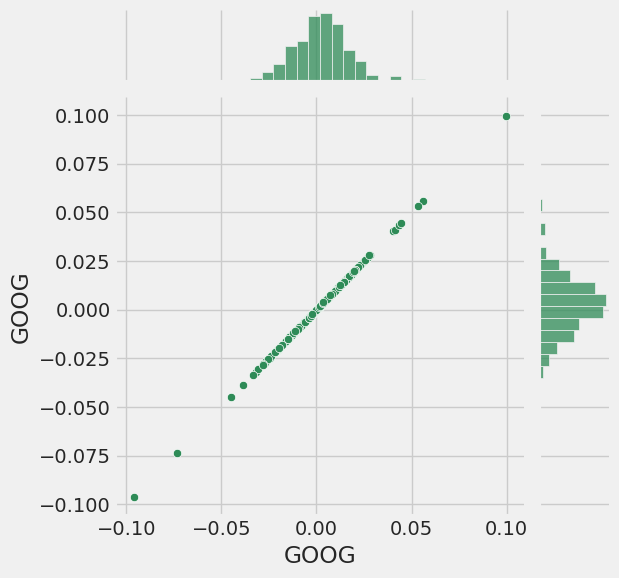

In [ ]:
# Comparing Google to itself should show a perfectly linear relationship
sns.jointplot(x='GOOG', y='GOOG', data=tech_rets, kind='scatter', color='seagreen')

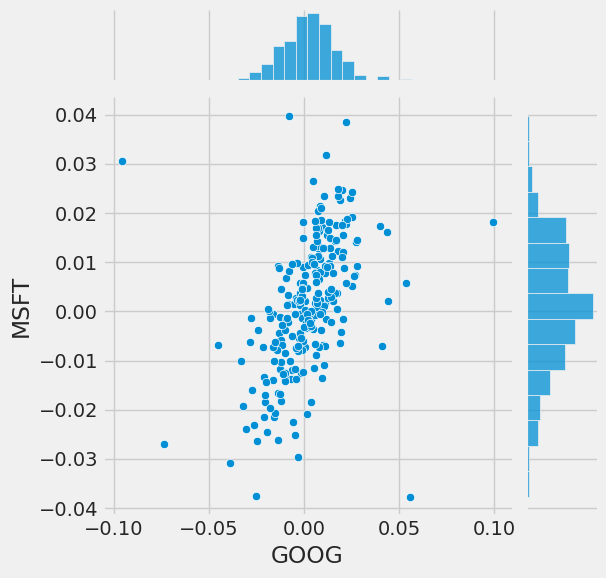

In [ ]:
# We'll use joinplot to compare the daily returns of Google and Microsoft
sns.jointplot(x='GOOG', y='MSFT', data=tech_rets, kind='scatter')

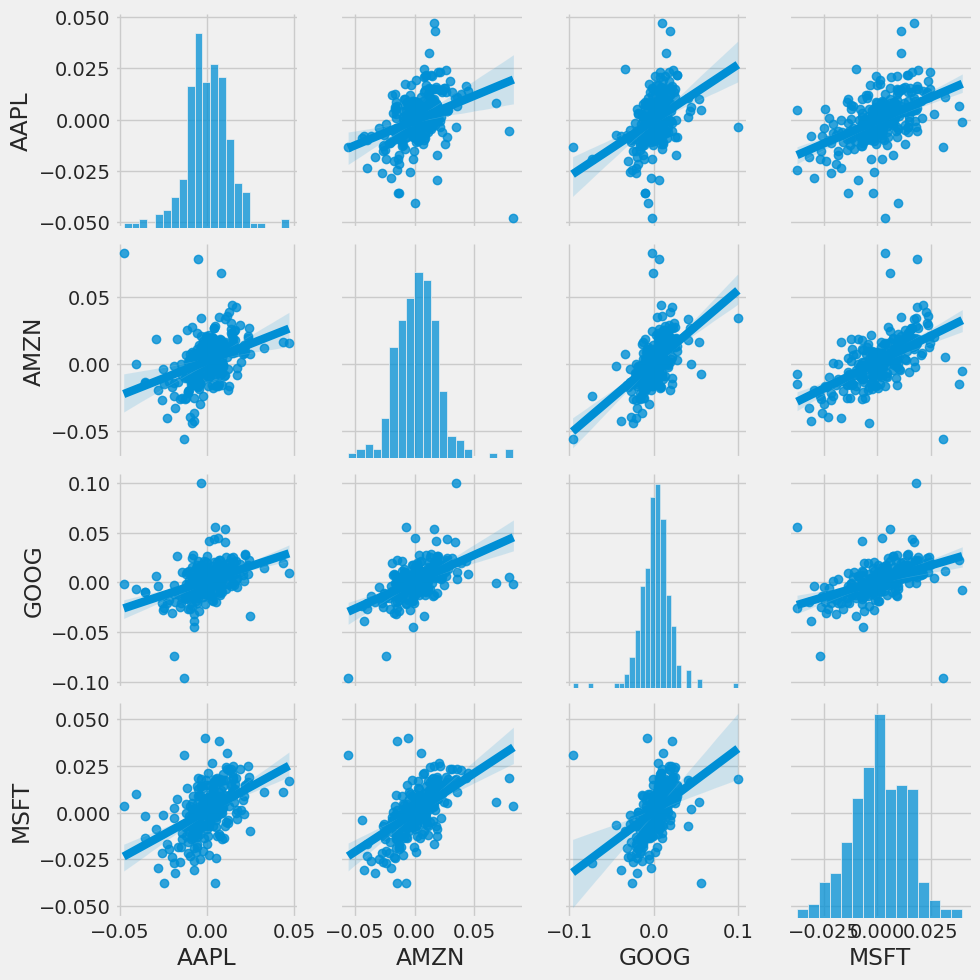

In [ ]:
# We can simply call pairplot on our DataFrame for an automatic visual analysis
# of all the comparisons

sns.pairplot(tech_rets, kind='reg')

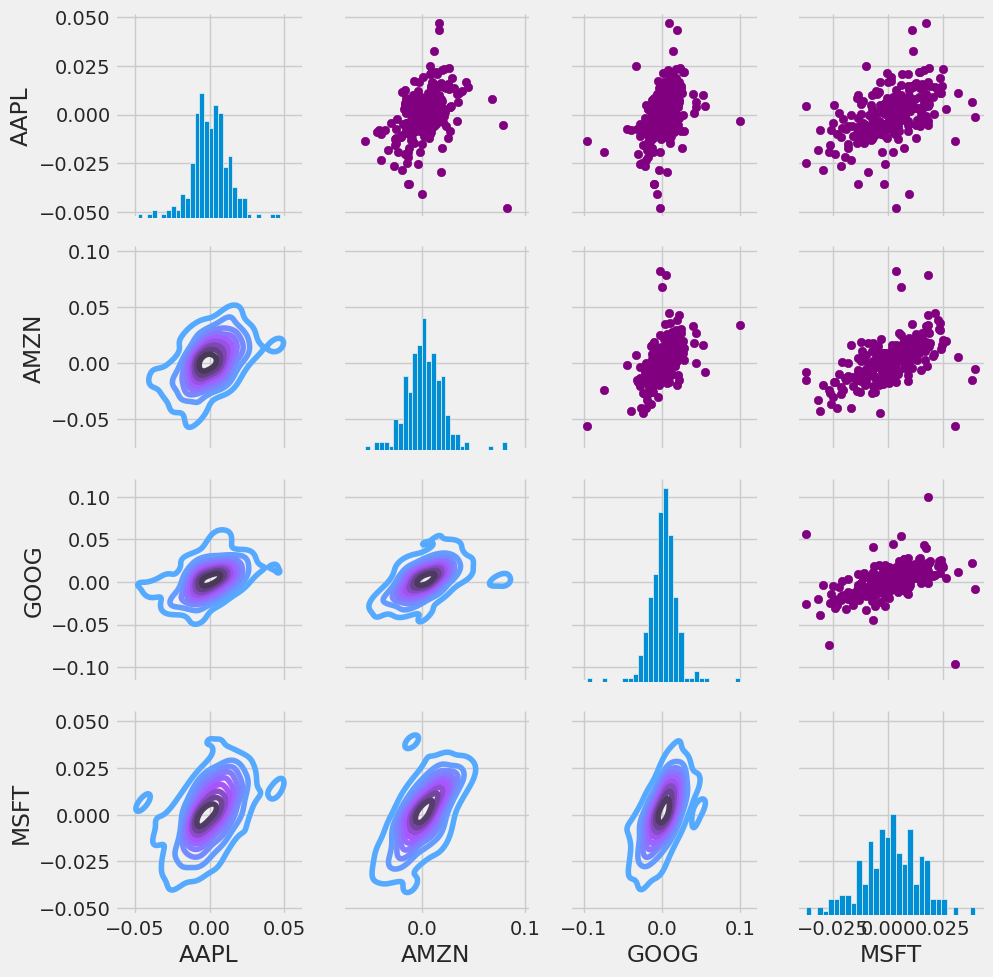

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
return_fig = sns.PairGrid(tech_rets.dropna())

# Using map_upper we can specify what the upper triangle will look like.
return_fig.map_upper(plt.scatter, color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde)
# or the color map (BluePurple)
return_fig.map_lower(sns.kdeplot, cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
return_fig.map_diag(plt.hist, bins=30)

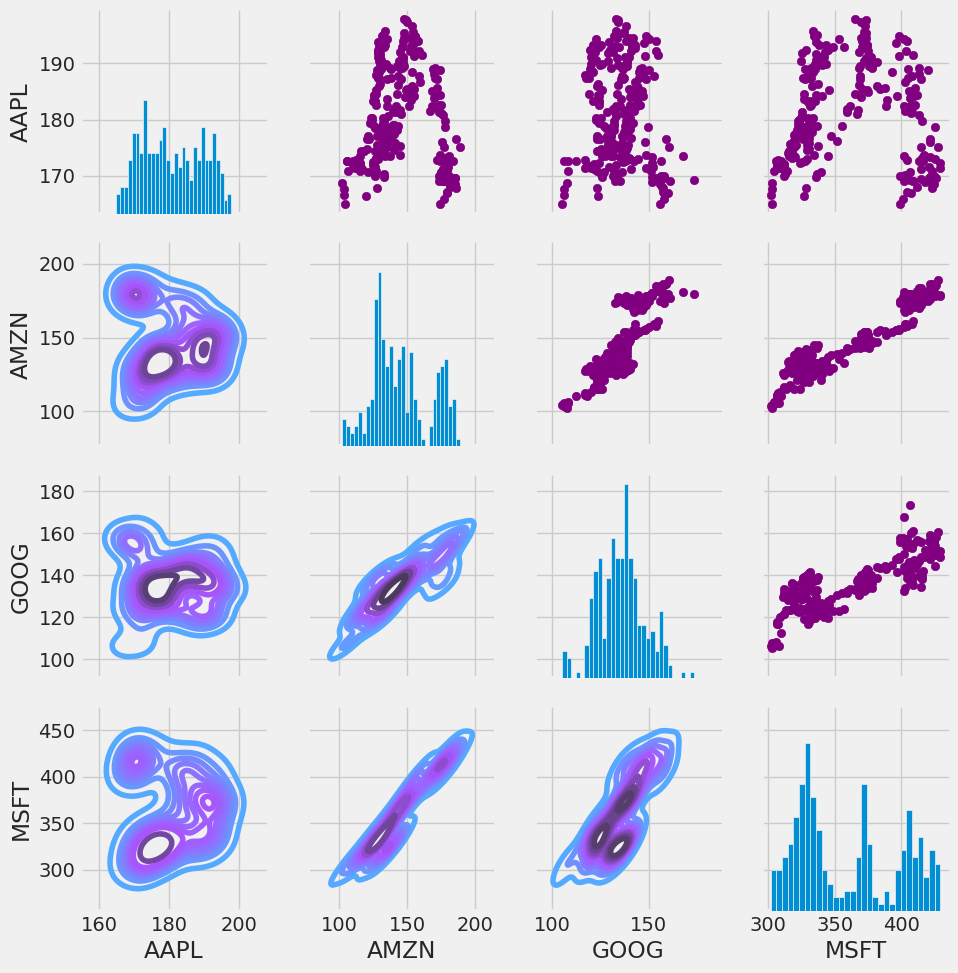

In [ ]:
# Set up our figure by naming it returns_fig, call PairPLot on the DataFrame
returns_fig = sns.PairGrid(closing_df)

# Using map_upper we can specify what the upper triangle will look like.
returns_fig.map_upper(plt.scatter,color='purple')

# We can also define the lower triangle in the figure, inclufing the plot type (kde) or the color map (BluePurple)
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')

# Finally we'll define the diagonal as a series of histogram plots of the daily return
returns_fig.map_diag(plt.hist,bins=30)

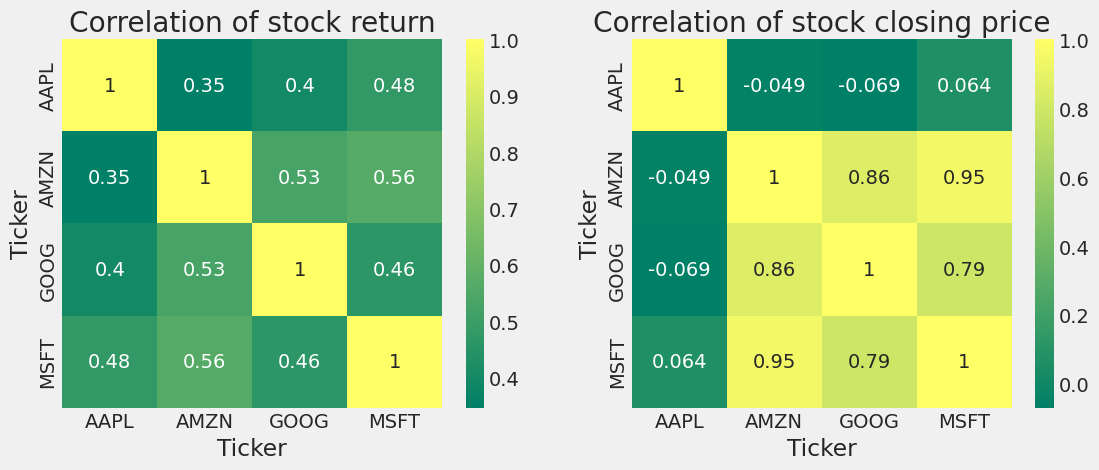

In [ ]:
# Import the necessary libraries for data visualization and analysis
import matplotlib.pyplot as plt
import seaborn as sns

# Create a new figure for plotting with a specified size
plt.figure(figsize=(12, 10))

# Create the first subplot in a 2x2 grid of subplots
plt.subplot(2, 2, 1)

# Generate a heatmap of the correlation matrix for daily stock returns (tech_rets)
# - 'tech_rets.corr()' calculates the correlation between different tech stocks' daily returns
# - 'annot=True' adds numeric values to the heatmap cells for better readability
# - 'cmap='summer'' sets the color map for the heatmap
plt.title('Correlation of stock return')  # Set the title for the subplot
sns.heatmap(tech_rets.corr(), annot=True, cmap='summer')

# Create the second subplot in the 2x2 grid of subplots
plt.subplot(2, 2, 2)

# Generate a heatmap of the correlation matrix for stock closing prices (closing_df)
# - 'closing_df.corr()' calculates the correlation between different tech stocks' closing prices
# - 'annot=True' adds numeric values to the heatmap cells for better readability
# - 'cmap='summer'' sets the color map for the heatmap
plt.title('Correlation of stock closing price')  # Set the title for the subplot
sns.heatmap(closing_df.corr(), annot=True, cmap='summer')

# Display the final plot with both subplots
plt.show()


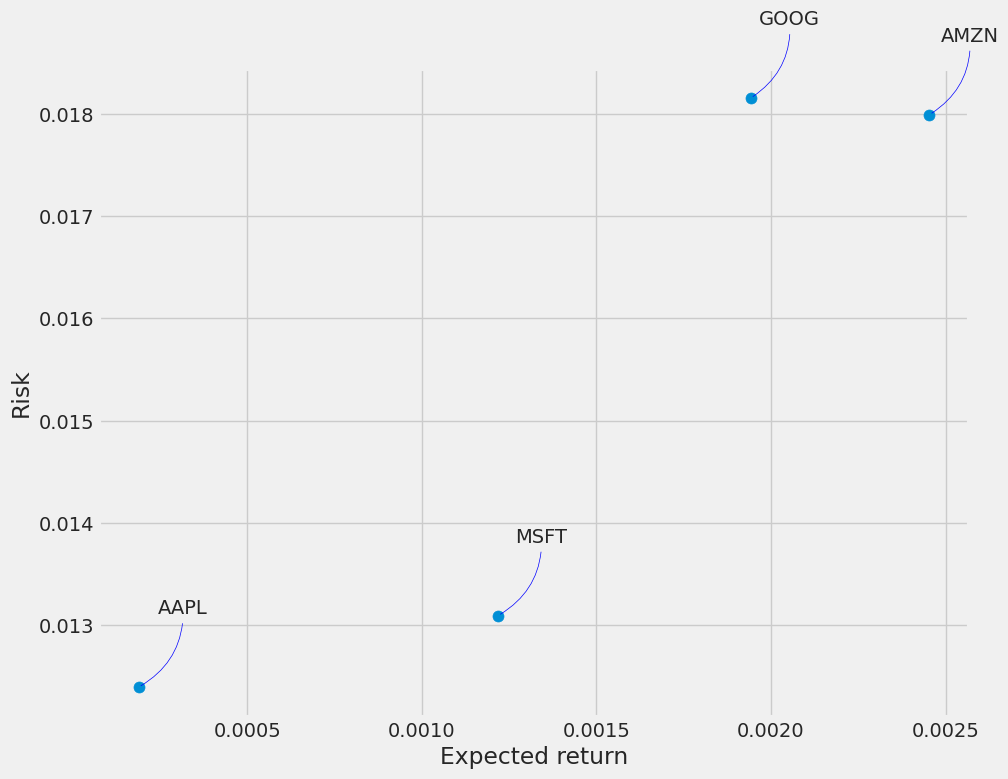

In [ ]:
# Drop rows with missing values (NaN) from the tech_rets DataFrame
rets = tech_rets.dropna()

# Calculate the area of the data points for the scatter plot
area = np.pi * 20

# Create a new figure for the scatter plot with a specified size
plt.figure(figsize=(10, 8))

# Create a scatter plot of expected return (x-axis) vs. risk (y-axis)
plt.scatter(rets.mean(), rets.std(), s=area)

# Label the x-axis with 'Expected return' and the y-axis with 'Risk'
plt.xlabel('Expected return')
plt.ylabel('Risk')

# Add labels to the data points with annotations
for label, x, y in zip(rets.columns, rets.mean(), rets.std()):
    # 'label' is the stock's name, 'x' is its mean return, and 'y' is its standard deviation (risk)
    # 'xytext' sets an offset from the data point for the label
    # 'arrowprops' adds an arrow connecting the label to the data point for visualization
    plt.annotate(label, xy=(x, y), xytext=(50, 50), textcoords='offset points', ha='right', va='bottom',
                 arrowprops=dict(arrowstyle='-', color='blue', connectionstyle='arc3,rad=-0.3'))

In [ ]:
# Get the stock quote
df = pdr.get_data_yahoo('AAPL', start='2012-01-01', end=datetime.now())
# Show teh data
df

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.433823,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.500642,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.639427,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.771556,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.751299,394024400
...,...,...,...,...,...,...
2024-04-23,165.350006,167.050003,164.919998,166.899994,166.899994,49537800
2024-04-24,166.539993,169.300003,166.210007,169.020004,169.020004,48251800
2024-04-25,169.529999,170.610001,168.149994,169.889999,169.889999,50558300


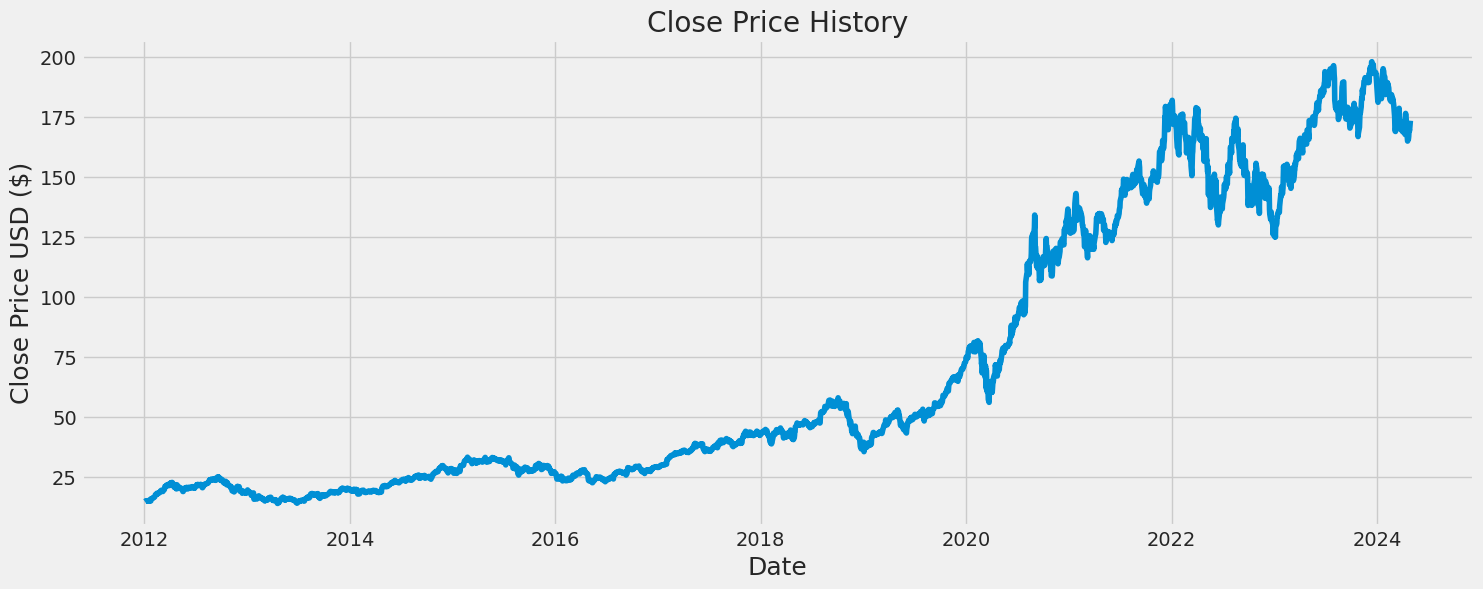

In [ ]:
# Create a new Matplotlib figure for the plot with a specified size (16 units wide and 6 units tall)
plt.figure(figsize=(16, 6))
# Set the title of the plot
plt.title('Close Price History')
# Plot the 'Close' price data from the DataFrame 'df'
plt.plot(df['Close'])
# Add a label to the x-axis
plt.xlabel('Date', fontsize=18)
# Add a label to the y-axis
plt.ylabel('Close Price USD ($)', fontsize=18)
# Display the plot
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Close'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .95 ))

training_data_len

2945

In [ ]:
# Scale the data
# Create a MinMaxScaler object with a specified feature range, usually (0, 1)
scaler = MinMaxScaler(feature_range=(0,1))
# Use the MinMaxScaler to transform the 'dataset' into a scaled version
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00401431],
       [0.00444289],
       [0.00533302],
       ...,
       [0.84676576],
       [0.84356209],
       [0.86636801]])

In [ ]:
# Create the training data set

# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

# Iterate through the training data, considering a window of 60 data points
for i in range(60, len(train_data)):
  # Append the last 60 data points (x) to x_train
  x_train.append(train_data[i-60:i, 0])
  # Append the next data point (y) to y_train
  y_train.append(train_data[i, 0])

  # If we're in the initial loop iterations, print the data for illustration
  if i <= 61:
    print(x_train)
    print(y_train)
    print()

# Convert the x_train and y_train lists to NumPy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the x_train data to match the input shape expected by some machine learning models (usually (samples, time steps, features))
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.00577323, 0.00715207, 0.00579457,
       0.01088518, 0.01049151, 0.01100542, 0.01211663, 0.01278955,
       0.01273332, 0.01252582, 0.01341013, 0.01424207, 0.01518457,
       0.01670691, 0.01990478, 0.01995326, 0.02173353, 0.02306387,
       0.02077746, 0.02165789, 0.02164044, 0.02410915, 0.02375813,
       0.02440779, 0.02557523, 0.0262249 , 0.02809631, 0.02945961,
       0.02985329, 0.02999098, 0.02765997, 0.02709757, 0.02718096,
       0.02937236, 0.02998905, 0.03131358, 0.03443581, 0.03860139,
       0.0378218 , 0.03782373, 0.04083544, 0.04177794, 0.04110694,
       0.04049413, 0.03985611, 0.04197573, 0.0434302 , 0.04403914])]
[0.042534249860459186]

[array([0.00401431, 0.00444289, 0.00533302, 0.00618049, 0.00605056,
       0.00634339, 0.00620958, 0.00598462, 0.00567821, 0.00662652,
       0.00748175, 0.007218  , 0.0

(2885, 60, 1)

In [ ]:
# Create a Sequential model
model = Sequential()

# Add the first LSTM layer with 128 units, return_sequences=True, and specify the input shape
model.add(LSTM(128, return_sequences=True, input_shape=(x_train.shape[1], 1)))

# Add the second LSTM layer with 64 units and return_sequences=False
model.add(LSTM(64, return_sequences=False))

# Add a Dense (fully connected) layer with 25 units
model.add(Dense(25))

# Add another Dense layer with a single unit, which is common for regression tasks
model.add(Dense(1))

# Compile the model, specifying the optimizer and loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model using the training data (x_train and y_train)
# - 'batch_size=1' indicates that the model is updated after processing each individual sample
# - 'epochs=1' means the model will iterate through the entire training dataset once
model.fit(x_train, y_train, batch_size=1, epochs=1)

2885/2885 [==============================] - 141s 48ms/step - loss: 0.0012


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 60: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

5/5 [==============================] - 1s 31ms/step


4.296293634736515

<ipython-input-27-bbc2d5f999a0>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


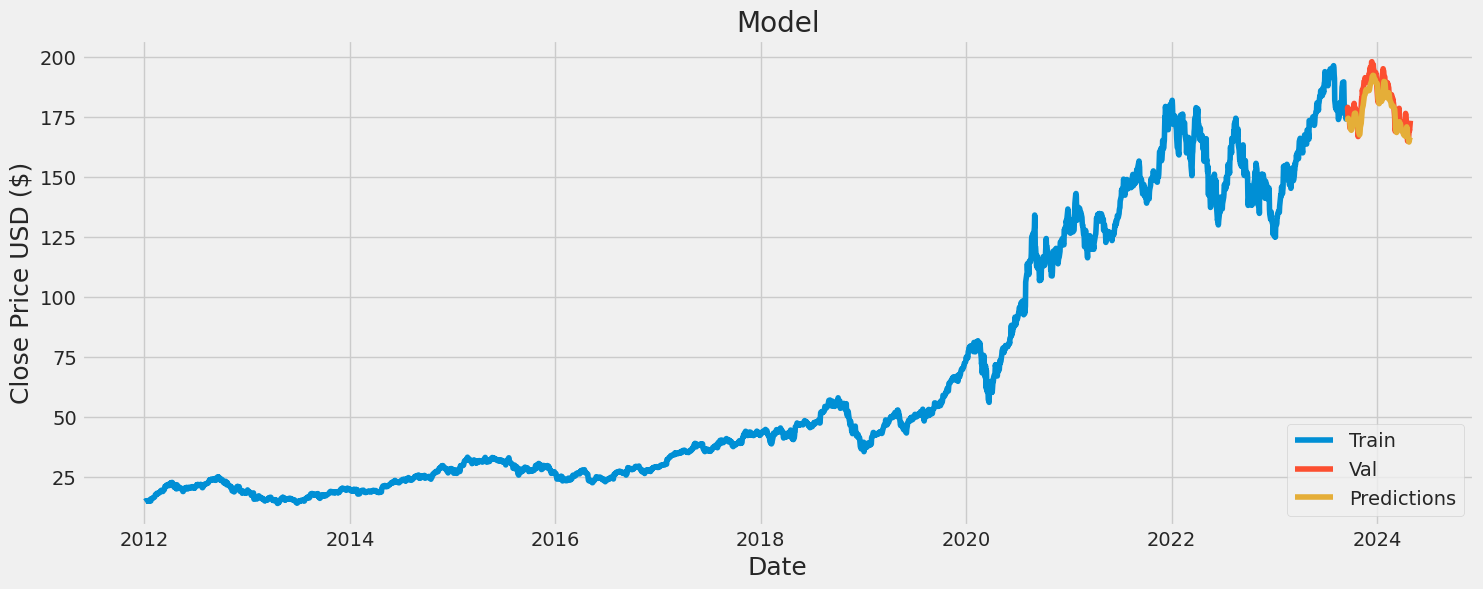

In [ ]:
# Select the training data and validation data
train = data[:training_data_len]
valid = data[training_data_len:]

# Add a new column 'Predictions' to the validation data DataFrame to store model predictions
valid['Predictions'] = predictions
# Create a figure for plotting with a specific size
plt.figure(figsize=(16, 6))
# Set the title of the plot
plt.title('Model')
# Label the x-axis
plt.xlabel('Date', fontsize=18)
# Label the y-axis
plt.ylabel('Close Price USD ($)', fontsize=18)
# Plot the training data's 'Close' prices
plt.plot(train['Close'])
# Plot the validation data's 'Close' prices and the model's predictions
plt.plot(valid[['Close', 'Predictions']])
# Add a legend to differentiate the lines on the plot
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
# Display the plot
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2023-09-18,177.970001,173.043304
2023-09-19,179.070007,173.499710
2023-09-20,175.490005,174.436035
2023-09-21,173.929993,174.557037
2023-09-22,174.789993,173.999283
...,...,...
2024-04-23,166.899994,165.025009
2024-04-24,169.020004,164.605759
2024-04-25,169.889999,165.051453


from matplotlib import pyplot as plt
valid['Close'].plot(kind='hist', bins=20, title='Close')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='hist', bins=20, title='Predictions')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid.plot(kind='scatter', x='Close', y='Predictions', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
valid['Close'].plot(kind='line', figsize=(8, 4), title='Close')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
valid['Predictions'].plot(kind='line', figsize=(8, 4), title='Predictions')
plt.gca().spines[['top', 'right']].set_visible(False)